# Part 1 - Facial Key points detection

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Modern AI/Emotion AI/

/content/drive/My Drive/Modern AI/Emotion AI


In [ ]:
# Basic standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,BatchNormalization,Dropout,ZeroPadding2D,AveragePooling2D,Flatten,Dense,Add
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Model
import tensorflow as tf

## Loading dataset

In [ ]:
keyfacial_df = pd.read_csv('data.csv')

In [ ]:
keyfacial_df.info()
# There are 15 data points for image with x,y coordinates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [ ]:
# Check if there is any isnull element in the datafram
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

## Conversion of image from string to numpy array

In [ ]:
# Since values for the image are given as space separated string, separate the values using ' ' as separator.
# Then convert this into numpy array using np.fromstring and convert the obtained 1D array into 2D array of shape (96, 96)
keyfacial_df['Image'] = keyfacial_df.Image.apply(lambda x: np.fromstring(x, dtype = int, sep=' ').reshape(96,96))

In [ ]:
keyfacial_df['Image'][0].shape

(96, 96)

In [ ]:
keyfacial_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


## Image Visualization

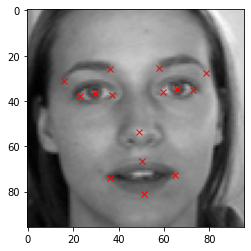

In [ ]:
# Fetching a random number which will be the index for the image to be plotted
i = np.random.randint(1,len(keyfacial_df))
# plotting the image for ith index from the dataset
plt.imshow(keyfacial_df.iloc[i]['Image'],cmap='gray')
# plotting all the x and y coordinates given for 15 points on the face
for j in range(0,30,2):
  plt.plot(keyfacial_df.iloc[i][j],keyfacial_df.iloc[i][j+1],'rx')
plt.show()

In [ ]:
def plotImageWithPoints(df,index):
  plt.imshow(df.iloc[index]['Image'],cmap='gray')
  for j in range(0,30,2):
    plt.plot(df.iloc[index][j],df.iloc[index][j+1],'rx')


### Visualzing 64 random images along with key facial points

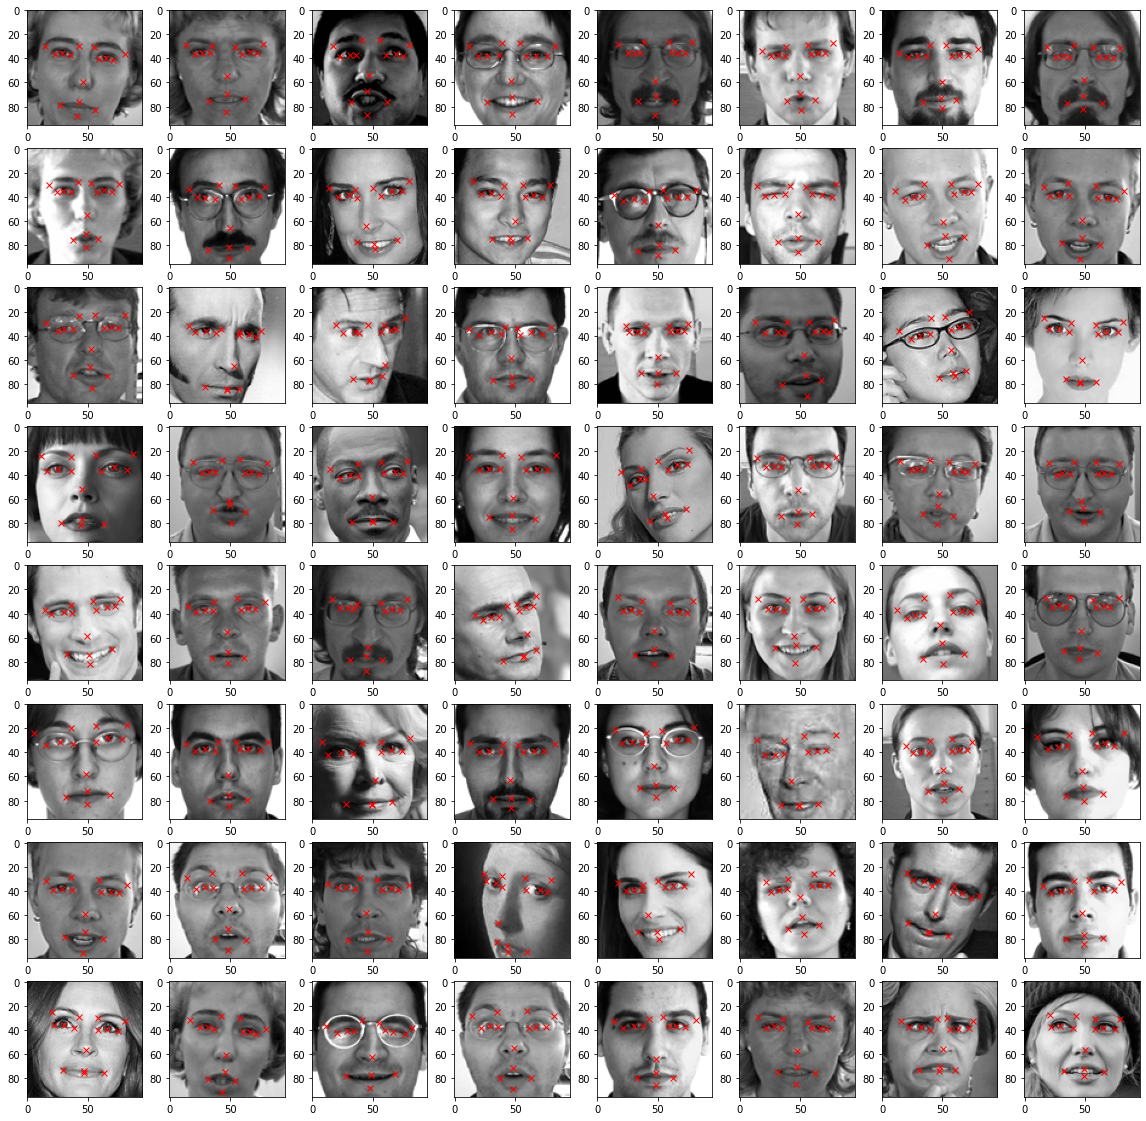

In [ ]:
# plotting 64 such random images from the dataset to validate if the data makes sense or not
import random
indexes = np.random.randint(1,len(keyfacial_df),64)
fig = plt.figure(figsize = (20,20))
for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  index = random.randint(1,len(keyfacial_df))
  plotImageWithPoints(keyfacial_df,index)

## Perform Image augmentation

In [ ]:
# Create a new copy of dataframe
keyfacial_df_copy = keyfacial_df.copy()

In [ ]:
# Obtain all the columns from the dataset 
cols = keyfacial_df_copy.columns
print(cols)

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')


### Horizontal flip

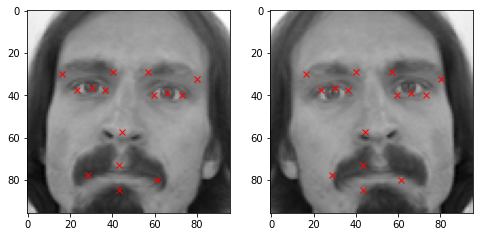

In [ ]:
# Flipping the image along y axis(no change in y-axis coordinates) using np.flip
ind = 0
keyfacial_df_copy['Image'] = keyfacial_df_copy.Image.apply(lambda x : np.flip(x,axis=1))
fig = plt.figure(figsize=(8,6))
fig.add_subplot(1,2,1)
plotImageWithPoints(keyfacial_df,ind)
fig.add_subplot(1,2,2)
plotImageWithPoints(keyfacial_df_copy,ind)
plt.show()


In [ ]:
# Since we are flipping horizontly y-axis is not being changed only x axis is flipped
# So we will just flip the x axis , to do that we will substract x cordinate by 96 because image has 96 pixels horizontly and vertically so substracting 96 from each x coordinate
# will exactly flip the x coordinates
for i in range(0,30,2):
  keyfacial_df_copy[cols[i]] = keyfacial_df_copy[cols[i]].apply(lambda x: 96. -x)


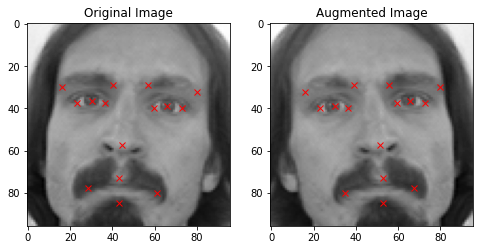

In [ ]:
ind=0
fig = plt.figure(figsize=(8,6))
fig.add_subplot(1,2,1)
plotImageWithPoints(keyfacial_df,ind)
plt.title('Original Image')
fig.add_subplot(1,2,2)
plotImageWithPoints(keyfacial_df_copy,ind)
plt.title('Augmented Image')
plt.show()

In [ ]:
# Concatenating augmented images to original dataset
augmented_df = np.concatenate((keyfacial_df,keyfacial_df_copy))
augmented_df.shape

(4280, 31)

### Increase brightness

In [ ]:
# Augmentation -2
# Increasing the brightness of the images
# We multiply the value of pixed x randomly by 1.5 or 2 and clipping it between 0 and 255 using np.clip
import random
keyfacial_df_copy = keyfacial_df.copy()
keyfacial_df_copy['Image'] = keyfacial_df_copy.Image.apply(lambda x: np.clip(random.uniform(1.5,2)*x,0,255))


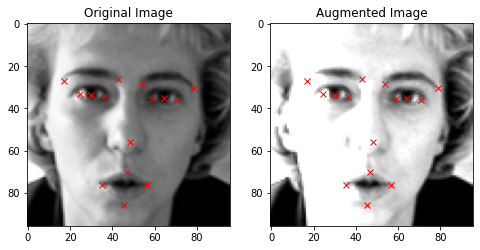

In [ ]:
ind=1
fig = plt.figure(figsize=(8,6))
fig.add_subplot(1,2,1)
plotImageWithPoints(keyfacial_df,ind)
plt.title('Original Image')
fig.add_subplot(1,2,2)
plotImageWithPoints(keyfacial_df_copy,ind)
plt.title('Augmented Image')
plt.show()

In [ ]:
# Concatenate to main df
augmented_df = np.concatenate((augmented_df,keyfacial_df_copy))
augmented_df.shape

(6420, 31)

## Image Normalization

In [ ]:
# Normalization helps gradient descent in optimization and faster to train the network
all_images = augmented_df[:,30]

all_images = all_images/255

# Create an empty array of shape 6420,96,96,1 to feed to NN model
X = np.empty((len(all_images),96,96,1))

# Expanding the dimension of image from 96,96 to 96,96,1 and saving the image into X
for i in range(len(all_images)):
  X[i,:] = np.expand_dims(all_images[i],axis=2)

# Convert the arraytype to float32
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

## Splitting images into train and test

In [ ]:
# Obtaining the predictor variable and storing the x and y coordinates in y
y = augmented_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

## Build deep residual network for keypoints classfication

### Res block create

In [ ]:

# Creating residual block which is followed by a convolution and then 2 identity blocks
def res_block(X,filter,stage):
  X_copy = X
  f1,f2,f3 = filter
  #Main path
  X = Conv2D(f1, kernel_size = (1,1),strides=(1,1),name='res_'+stage+'_conv_a',kernel_initializer=glorot_uniform(seed=0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis=3,  name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2,kernel_size = (3,3),strides=(1,1),padding='same',name='res_'+stage+'_conv_b',kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3,  name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3,kernel_size = (1,1),strides=(1,1),name='res_'+stage+'_conv_c',kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3,  name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3,kernel_size = (1,1),strides=(1,1),name='res_'+stage+'_conv_copy',kernel_initializer=glorot_uniform(seed=0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis=3,  name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)


  # Identity Block 1
  X_copy = X

  X = Conv2D(f1, kernel_size = (1,1),strides=(1,1),name='res_'+stage+'_identity_1_a',kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3,  name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2,kernel_size = (3,3),strides=(1,1),padding='same',name='res_'+stage+'_identity_1_b',kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3,  name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3,kernel_size = (1,1),strides=(1,1),name='res_'+stage+'_identity_1_c',kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3,  name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X

  X = Conv2D(f1, kernel_size = (1,1),strides=(1,1),name='res_'+stage+'_identity_2_a',kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3,  name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2,kernel_size = (3,3),strides=(1,1),padding='same',name='res_'+stage+'_identity_2_b',kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3,  name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3,kernel_size = (1,1),strides=(1,1),name='res_'+stage+'_identity_2_c',kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3,  name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X



### Model building

In [ ]:
# Building the final model

input_shape = (96, 96, 1)

# Adding Input layer
X_input = tf.keras.layers.Input(input_shape)

# Adding zero padding
X = ZeroPadding2D((3,3))(X_input)

# Stage 1
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis=3,  name = 'bn1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# Stage 2
X= res_block(X,[64,64,256],'2')

# Stage 3
X= res_block(X,[128,128,512],'3')


# Adding average pooling layer
X = AveragePooling2D((2,2),name = 'Average_pooling')(X)

# Flatten the output
X = Flatten()(X)
X = Dense(4096,activation = 'relu')(X)
X = Dropout(0.3)(X)
X = Dense(4096,activation = 'relu')(X)
X = Dropout(0.3)(X)
X = Dense(2048,activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(30,activation = 'relu')(X)

keyfacial_point_model = Model(inputs=X_input,outputs = X)

keyfacial_point_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 102, 102, 1)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 48, 48, 64)   3200        ['zero_padding2d_1[0][0]']       
                                                                                                  
 bn1 (BatchNormalization)       (None, 48, 48, 64)   256         ['conv1[0][0]']              

In [ ]:
# adam = tf.keras.optimizers.Adam()
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
keyfacial_point_model.compile(loss = 'mean_squared_error',optimizer=adam,metrics = ['accuracy'])

In [ ]:
# Create callbacks for earlystopping, ReduceLROnPlateau and modelcheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1,patience=20)
modelCheckPoint = tf.keras.callbacks.ModelCheckpoint(filepath='Facial_keypoint_weights_1102.hdf5',verbose=1, save_best_only=True)
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=5,factor=0.5,verbose=2)

In [ ]:
tf.keras.backend.clear_session()

### Model training

In [ ]:
epochs = 50
batch_size = 64
history = keyfacial_point_model.fit(X_train,y_train,epochs=epochs,validation_split=0.15,callbacks = [modelCheckPoint,early_stopping],batch_size = batch_size)

Epoch 1/50
77/77 [==============================] - ETA: 0s - loss: 396.5432 - accuracy: 0.3861
Epoch 1: val_loss improved from inf to 1560.27881, saving model to Facial_keypoint_weights_1102.hdf5
77/77 [==============================] - 14s 149ms/step - loss: 396.5432 - accuracy: 0.3861 - val_loss: 1560.2788 - val_accuracy: 0.6713
Epoch 2/50
77/77 [==============================] - ETA: 0s - loss: 146.4565 - accuracy: 0.5182
Epoch 2: val_loss improved from 1560.27881 to 838.42859, saving model to Facial_keypoint_weights_1102.hdf5
77/77 [==============================] - 5s 65ms/step - loss: 146.4565 - accuracy: 0.5182 - val_loss: 838.4286 - val_accuracy: 0.6713
Epoch 3/50
77/77 [==============================] - ETA: 0s - loss: 105.2266 - accuracy: 0.5329
Epoch 3: val_loss improved from 838.42859 to 600.98486, saving model to Facial_keypoint_weights_1102.hdf5
77/77 [==============================] - 5s 65ms/step - loss: 105.2266 - accuracy: 0.5329 - val_loss: 600.9849 - val_accuracy: 

In [ ]:
# Plotting the logs and accuracy of model for different epochs on train and validation dataset
def plot_loss_accuracy(history):
  plt.figure(figsize=(15,4))
  plt.subplot(121)
  plt.plot(range(len(history.history['val_loss'])),history.history['val_loss'],label='Validation loss')
  plt.plot(range(len(history.history['loss'])),history.history['loss'],label='Train loss')
  plt.title('Validation loss vs Train loss')
  plt.legend()
  plt.subplot(122)
  plt.plot(range(len(history.history['val_accuracy'])),history.history['val_accuracy'],label='Validation Accuracy')
  plt.plot(range(len(history.history['accuracy'])),history.history['accuracy'],label='Train Accuracy')
  plt.title('Validation Accuracy vs Train Accuracy')
  plt.legend()
  plt.show()

In [ ]:
# Save the model architecture to json file for future use
json_model = keyfacial_point_model.to_json()
with open('keyFacialModel.json','w') as json_file:
  json_file.write(json_model)


In [ ]:
#Load the model 
with open('keyFacialModel.json','r') as json_file:
  model_keyfacial = json_file.read()

model_keyfacial = tf.keras.models.model_from_json(model_keyfacial)
model_keyfacial.load_weights('Facial_keypoint_weights.hdf5')
adam = tf.keras.optimizers.Adam()
model_keyfacial.compile(loss = 'mean_squared_error',optimizer=adam,metrics = ['accuracy'])


### Evaluate model on test data

In [ ]:
# Accuracy score of model on test(unseen) data
result = keyfacial_point_model.evaluate(X_test,y_test)
result

21/21 [==============================] - 1s 19ms/step - loss: 79.5738 - accuracy: 0.6885


[79.57379150390625, 0.6884735226631165]

# Part 2: Facial Expression Detection (Emotion)

### Images belong to 5 categories
* 0 - Angry
* 1 - Disgust
* 2 - Sad
* 3 - Happy
* 4 - Surprise

## Data loading

In [ ]:
facialrecog_df = pd.read_csv('icml_face_data.csv')
facialrecog_df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...


In [ ]:
# Check if there is any null values in the column
facialrecog_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [ ]:
facialrecog_df.rename(columns = {' pixels':'pixels'},inplace=True)

In [ ]:
# There are 25k images given
# The pixels of each image is given in string format
# The images are in the shape of 48 * 48
facialrecog_df.pixels[0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

## Image preprocessing

In [ ]:
# Creating function to convert image from string to array
def str2array(img):
  img = np.array(img.split()).reshape(48,48).astype('float32')
  return img

In [ ]:
# Function to resize image to 96 by 96
import cv2
def resizeImage(img):
  return cv2.resize(img, dsize = (96,96), interpolation = cv2.INTER_CUBIC)

Shape of the image (48, 48)


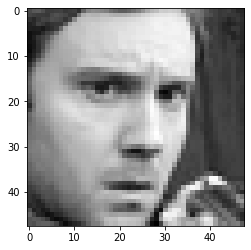

In [ ]:
# Plotting the image after converting it into 2d array of size 48 by 48
img = str2array(facialrecog_df.pixels[0])
print('Shape of the image', img.shape)
plt.imshow(img,cmap='gray')
plt.show()

Shape of the image (96, 96)


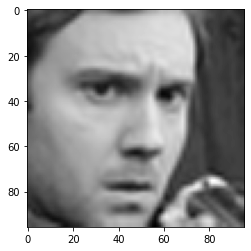

In [ ]:
# plotting the image after resizing to 96 by 96
img = resizeImage(str2array(facialrecog_df.pixels[0]))
print('Shape of the image', img.shape)
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
# applying functions to convert from string to array and resizing to 96 by 96 for all the images in the dataframe
facialrecog_df['pixels'] = facialrecog_df['pixels'].apply(str2array)
facialrecog_df['pixels'] = facialrecog_df['pixels'].apply(resizeImage)
facialrecog_df.head()

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
3,2,"[[20.083221, 19.079437, 17.398712, 17.158691, ..."
4,3,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."


In [ ]:
# Shape of the image in the dataframe
facialrecog_df['pixels'][0].shape

(96, 96)

In [ ]:
# creating label map
labels = {0:'anger',1:'disgust',2:'sad',3:'happiness',4:'surprise'}

## Image visualization

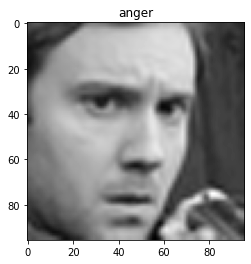

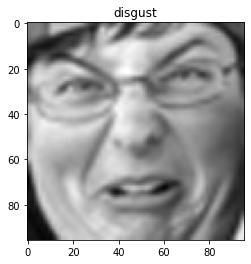

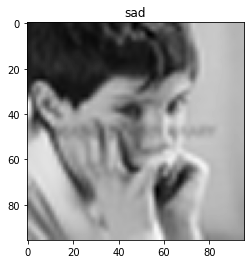

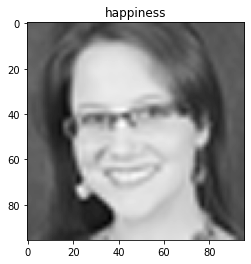

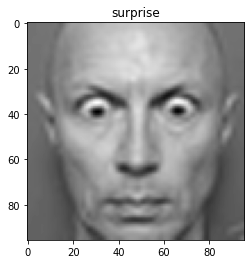

In [ ]:
# plotting image of each emotion type:

for i in labels.keys():
  img = facialrecog_df[facialrecog_df.emotion == i].iloc[0][1]
  plt.imshow(img,cmap='gray')
  plt.title(labels[i])
  plt.show()

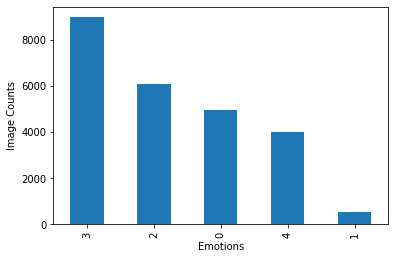

In [ ]:
# Plotting the emotions to look at the distribution of labels
facialrecog_df.emotion.value_counts().plot(kind='bar')
plt.xlabel('Emotions')
plt.ylabel('Image Counts')
plt.show()

# Looks like data is very less for Disgust emotion

## Data preparation and Image augmentation

In [ ]:
# Split the dataframe into features and labels
from keras.utils import to_categorical
X = facialrecog_df['pixels']
y = to_categorical(facialrecog_df.emotion)
print(X.shape)
print(y.shape)

(24568,)
(24568, 5)


In [ ]:
X

0        [[69.316925, 73.03865, 79.13719, 84.17186, 85....
1        [[151.09435, 150.91393, 150.65791, 148.96367, ...
2        [[23.061905, 25.50914, 29.47847, 33.99843, 36....
3        [[20.083221, 19.079437, 17.398712, 17.158691, ...
4        [[76.26172, 76.54747, 77.001785, 77.7672, 78.4...
                               ...                        
24563    [[-4.901001, 5.6496277, 22.477203, 49.366516, ...
24564    [[181.71645, 179.72063, 176.40785, 175.93037, ...
24565    [[178.1166, 176.83118, 174.74146, 172.61276, 1...
24566    [[16.883408, 16.953583, 17.081573, 16.53476, 1...
24567    [[30.199814, 29.574478, 28.545822, 27.846603, ...
Name: pixels, Length: 24568, dtype: object

In [ ]:
# Here we want to convert input into 24568 * 96 * 96* 1 shape
X = np.stack(X)
X = X.reshape(24568,96,96,1)
X.shape

(24568, 96, 96, 1)

In [ ]:
# Splitting the data into train , test and validation datasets
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.1,shuffle=True)
X_val, X_test , y_val , y_test = train_test_split(X_test,y_test,test_size=0.5,shuffle=True)

In [ ]:
print('Shape of train data',X_train.shape[0])
print('Shape of validation data',X_val.shape[0])
print('Shape of test data',X_test.shape[0])

Shape of train data 22111
Shape of validation data 1228
Shape of test data 1229


In [ ]:
# Normalizing the images
X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

In [ ]:
# Using tensorflow keras imagedatagenerator for image augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rotation_range=15,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

## Build and train Deep learning NN model for facial expression recognition

In [ ]:
input_shape = (96,96,1)

# Input tensor shape
X_input = tf.keras.layers.Input(input_shape)

# Adding zero padding which will increase the size to 102,102
X = ZeroPadding2D((3,3))(X_input)

# Conv 1
X = Conv2D(64, (7,7), strides = (2,2) , kernel_initializer = glorot_uniform(seed=0))(X)
X = BatchNormalization(axis=3)(X)
X = Activation('relu')(X)
X = MaxPool2D((3,3), strides = (2,2))(X)

# 2 stage
X = res_block(X,[64,64,256],stage='2')

# 3 stage
X = res_block(X,[128,128,512],stage='3')

# Average pooling layer
X = AveragePooling2D((4,4))(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', kernel_initializer = glorot_uniform(seed=0))(X)


model_2_emotion = Model(inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()




Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 64)   3200        ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 48, 48, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                

In [ ]:
model_2_emotion.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Create callbacks for earlystopping and modelcheckpoint
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1,patience=10)

# save the best model with lower validation loss
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='FacialExpressions_weight.hdf5',verbose=1,save_best_only=True)

### Model training

In [ ]:
batch_size = 64
epochs = 20
history_2 = model_2_emotion.fit(train_generator.flow(X_train,y_train,batch_size=batch_size),
                                validation_data=(X_val,y_val), epochs = epochs, steps_per_epoch = (len(X_train)/batch_size),
                                callbacks = [early_stopping,model_checkpoint])

Epoch 1/20
346/345 [==============================] - ETA: 0s - loss: 1.2506 - accuracy: 0.4776
Epoch 1: val_loss improved from inf to 1.32024, saving model to FacialExpressions_weight.hdf5
345/345 [==============================] - 27s 70ms/step - loss: 1.2506 - accuracy: 0.4776 - val_loss: 1.3202 - val_accuracy: 0.4389
Epoch 2/20
346/345 [==============================] - ETA: 0s - loss: 0.9349 - accuracy: 0.6272
Epoch 2: val_loss improved from 1.32024 to 1.04595, saving model to FacialExpressions_weight.hdf5
345/345 [==============================] - 22s 64ms/step - loss: 0.9349 - accuracy: 0.6272 - val_loss: 1.0459 - val_accuracy: 0.5953
Epoch 3/20
346/345 [==============================] - ETA: 0s - loss: 0.8160 - accuracy: 0.6831
Epoch 3: val_loss did not improve from 1.04595
345/345 [==============================] - 22s 62ms/step - loss: 0.8160 - accuracy: 0.6831 - val_loss: 1.2620 - val_accuracy: 0.5081
Epoch 4/20
346/345 [==============================] - ETA: 0s - loss: 0.76

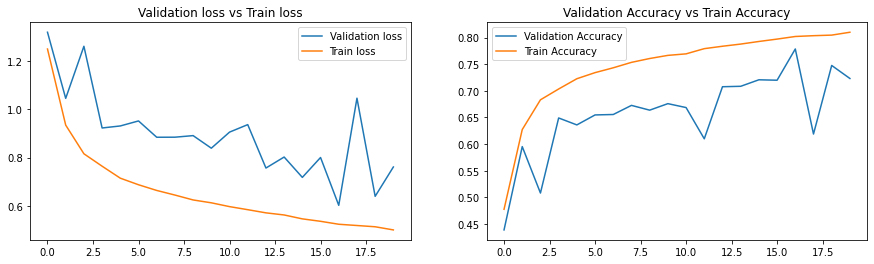

In [ ]:
# Plotting the logs and accuracy of model for different epochs on train and validation dataset
plot_loss_accuracy(history_2)

### Save model

In [ ]:
# This part will only save model architecture
model2_json = model_2_emotion.to_json()
with open('FacialExpressionModel.json','w') as json_file:
  json_file.write(model2_json)

### Model Evaluation

In [ ]:
# Loading the model architecture
with open('FacialExpressionModel.json','r') as json_file:
  facial_expression_model = json_file.read()

facial_expression_model = tf.keras.models.model_from_json(facial_expression_model)
# Loading weights of the model
facial_expression_model.load_weights('FacialExpressions_weight.hdf5')
# compile the model
facial_expression_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
score = facial_expression_model.evaluate(X_test,y_test)
print('Accuracy on test dataset',round(score[1],2))

39/39 [==============================] - 8s 13ms/step - loss: 0.5469 - accuracy: 0.7860
Accuracy on test dataset 0.79


In [ ]:
test_pred = np.argmax(facial_expression_model.predict(X_test),axis=1)

39/39 [==============================] - 0s 8ms/step


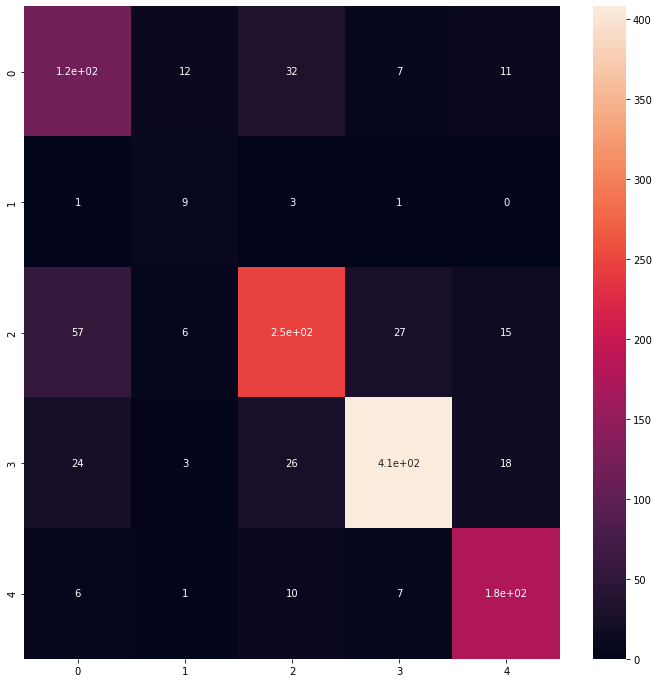

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure(figsize=(12,12))
cm = confusion_matrix(test_pred,np.argmax(y_test,axis=1))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print(classification_report(test_pred,np.argmax(y_test,axis=1)))

              precision    recall  f1-score   support

           0       0.57      0.66      0.61       181
           1       0.29      0.64      0.40        14
           2       0.78      0.70      0.74       353
           3       0.91      0.85      0.88       479
           4       0.80      0.88      0.84       202

    accuracy                           0.78      1229
   macro avg       0.67      0.75      0.69      1229
weighted avg       0.80      0.78      0.79      1229



## Printing 25 images from test data set with actual and predicted emotion

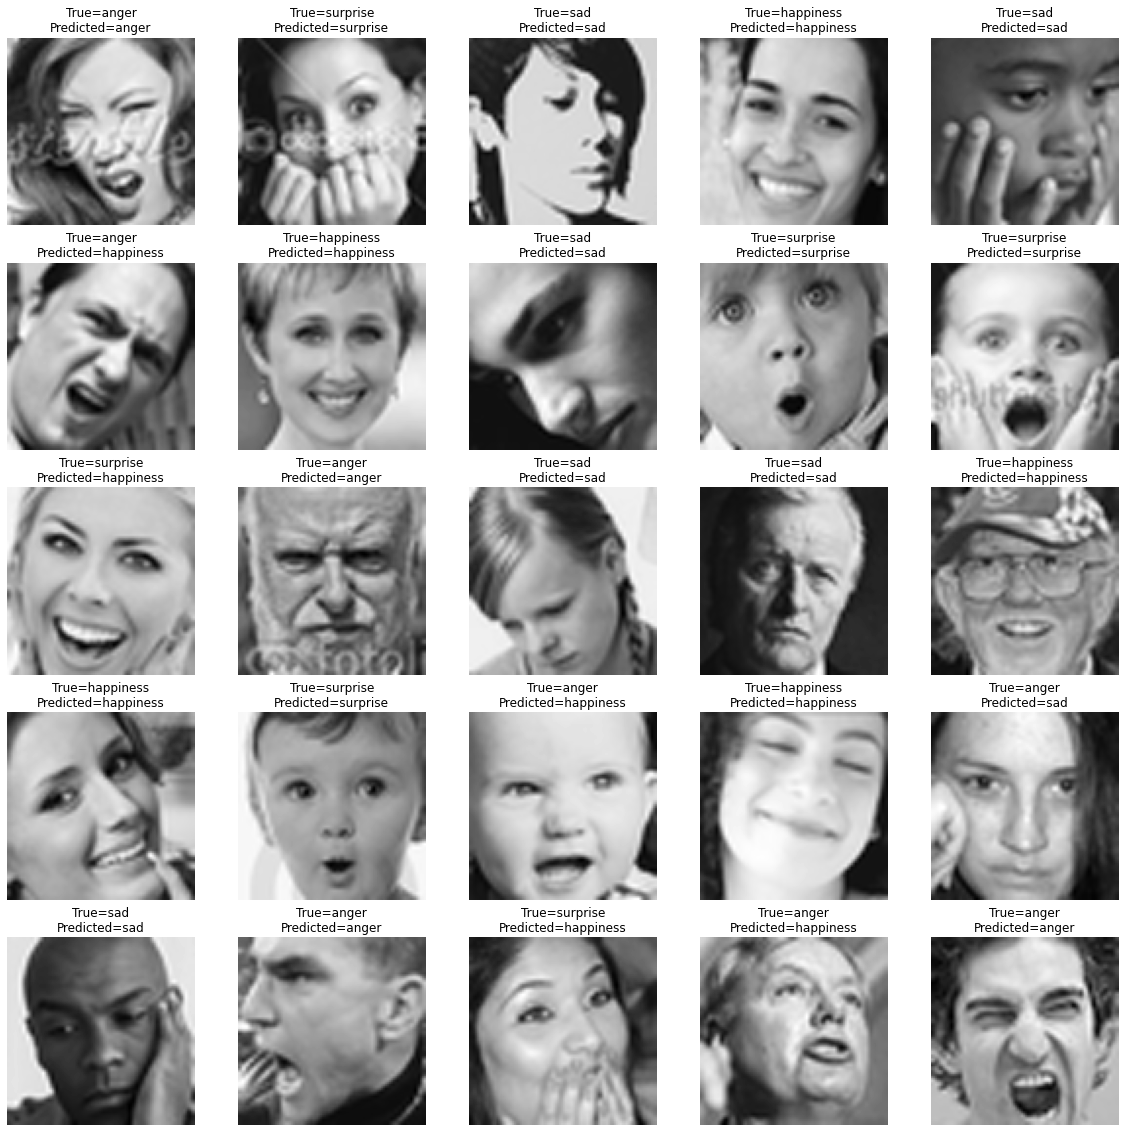

In [ ]:
fig = plt.figure(figsize=(20,20))
for ind in range(25):
  rand_ind = np.random.randint(0,len(X_test))
  img = X_test[rand_ind].reshape(96,96)
  actual_label = np.argmax(y_test[rand_ind])
  predicted_label = test_pred[rand_ind]
  ax = fig.add_subplot(5,5,(ind+1))
  plt.imshow(img,cmap='gray')
  plt.title('True='+labels.get(actual_label)+'\nPredicted='+labels.get(predicted_label))
  plt.axis('off')
plt.show()



# Part 3: Combine both the models


1.   Detecting Key facial points
2.   Emotion detection



In [ ]:
# This function will merge outputs from both the models and create a datafram with both predictions
def predict(X_test):
  df_predict = model_keyfacial.predict(X_test)
  df_predict = pd.DataFrame(df_predict,columns = cols[:30])
  df_predict['emotion'] = np.argmax(facial_expression_model.predict(X_test),axis=1)
  return df_predict

In [ ]:
predicted_values = predict(X_test)

35.688289642333984

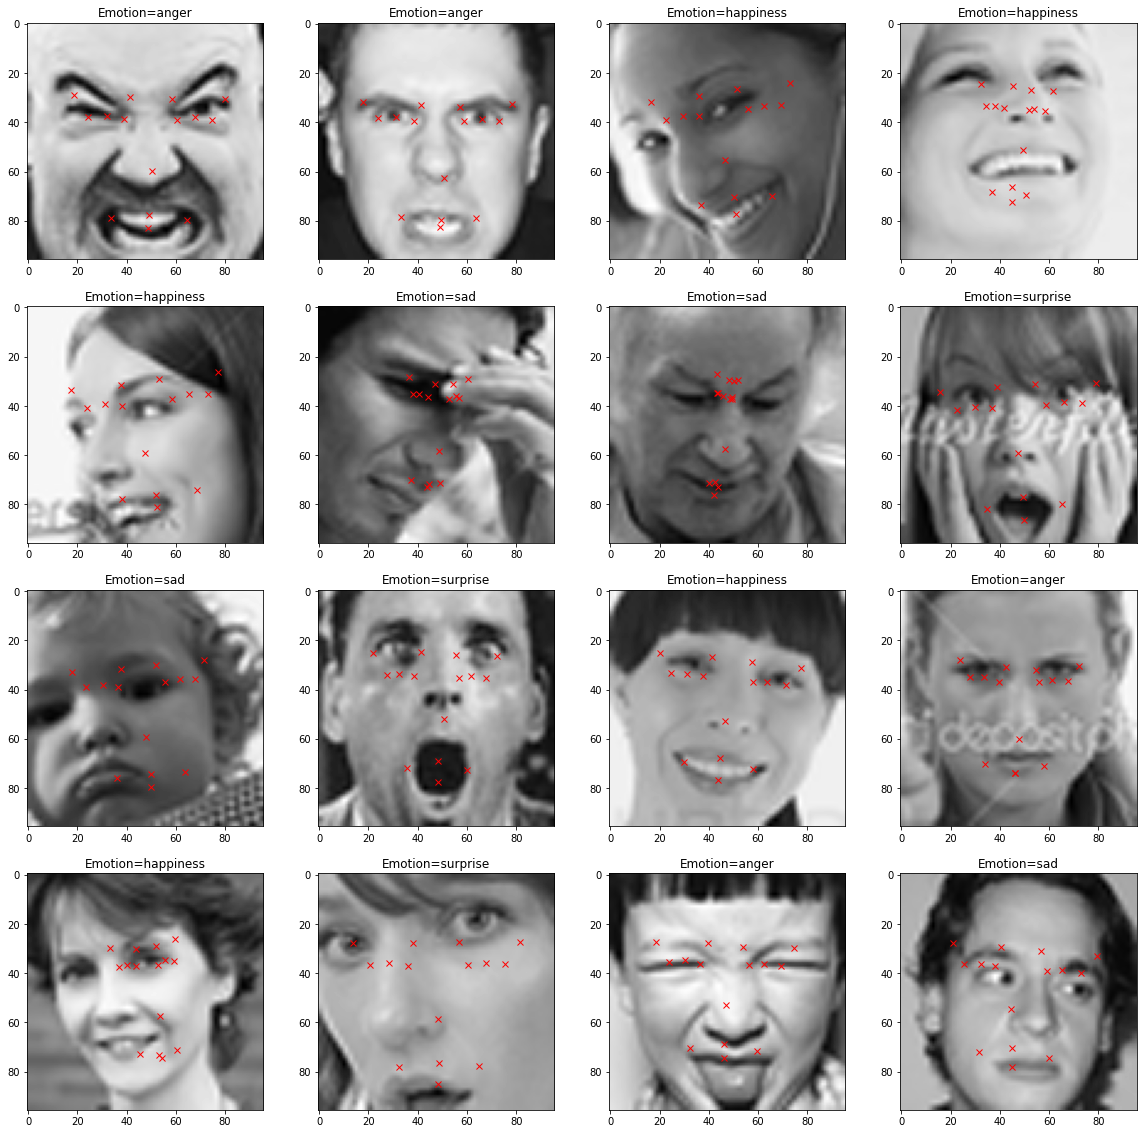

In [ ]:


# Plotting 16 random images from test data set with predicted value of key facial points and emotion

fig = plt.figure(figsize=(20,20))
for ind in range(16):
  rand_ind = np.random.randint(0,len(X_test))
  img = X_test[rand_ind].reshape(96,96)
  predicted_emotion = predicted_values.iloc[rand_ind]['emotion']
  ax = fig.add_subplot(4,4,(ind+1))

  plt.imshow(img,cmap='gray')
  plt.title('Emotion='+labels.get(predicted_emotion))
  # plt.axis('off')
  for j in range(0,30,2):
    plt.plot(predicted_values.loc[rand_ind][j],predicted_values.loc[rand_ind][j+1],'rx')
plt.show()